In [14]:
data_folder = "./Dataset"

Contoh Model dari https://www.kaggle.com/code/shivamburnwal/speech-emotion-recognition

---------------------------------------------------------------------------------------------------------------

In [70]:
%pip list

Package                VersionNote: you may need to restart the kernel to use updated packages.



---------------------- ------------
absl-py                1.4.0
appdirs                1.4.4
astunparse             1.6.3
audioread              3.0.0
backcall               0.2.0
cachetools             4.2.4
certifi                2023.5.7
cffi                   1.15.1
charset-normalizer     3.1.0
colorama               0.4.6
cycler                 0.11.0
debugpy                1.6.7
decorator              5.1.1
entrypoints            0.4
fonttools              4.38.0
gast                   0.3.3
google-auth            1.35.0
google-auth-oauthlib   0.4.6
google-pasta           0.2.0
grpcio                 1.54.2
h5py                   2.10.0
idna                   3.4
importlib-metadata     6.6.0
ipykernel              6.16.2
ipython                7.34.0
jedi                   0.18.2
joblib                 1.2.0
jupyter_client         7.4.9
jupyter_core           4.12.0
Keras-Preprocessing    1.1.2
kiwisolver             1.4.4
lazy_loader            0.2
librosa                0.10.

In [1]:
import pandas as pd
import numpy as np

import os
import sys

# librosa is a Python library for analyzing audio and music. It can be used to extract the data from the audio files we will see it later.
import matplotlib.pyplot as plt
import librosa
import librosa.display
import seaborn as sns

from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# to play the audio files
from IPython.display import Audio

import tensorflow.keras as keras
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization
# from tensorflow.keras.utils import np_utils, to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint

import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning) 

c:\Users\abdul\AppData\Local\Programs\Python\Python37\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
c:\Users\abdul\AppData\Local\Programs\Python\Python37\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ndarray size changed, may indicate binary incompatibility. Expected 80 from C header, got 88 from PyObject
  return f(*args, **kwds)


In [15]:
# Paths for data.
Ravdess = f"{data_folder}/RAVDESS Emotional speech audio/audio_speech_actors_01-24/"
Crema = f"{data_folder}/CREMA-D/AudioWAV/"
Tess = f"{data_folder}/Toronto emotional speech set (TESS)/tess toronto emotional speech set data/TESS Toronto emotional speech set data/"
Savee = f"{data_folder}/Surrey Audio-Visual Expressed Emotion (SAVEE)/ALL/"

In [16]:
ravdess_directory_list = os.listdir(Ravdess)

file_emotion = []
file_path = []
for dir in ravdess_directory_list:
    # as their are 20 different actors in our previous directory we need to extract files for each actor.
    actor = os.listdir(Ravdess + dir)
    for file in actor:
        part = file.split('.')[0]
        part = part.split('-')
        # third part in each file represents the emotion associated to that file.
        file_emotion.append(int(part[2]))
        file_path.append(Ravdess + dir + '/' + file)
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Ravdess_df = pd.concat([emotion_df, path_df], axis=1)

# changing integers to actual emotions.
Ravdess_df.Emotions.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'}, inplace=True)
Ravdess_df.head()

Emotions                                               Path
0  neutral  ./Dataset/RAVDESS Emotional speech audio/audio...
1  neutral  ./Dataset/RAVDESS Emotional speech audio/audio...
2  neutral  ./Dataset/RAVDESS Emotional speech audio/audio...
3  neutral  ./Dataset/RAVDESS Emotional speech audio/audio...
4     calm  ./Dataset/RAVDESS Emotional speech audio/audio...

In [17]:
crema_directory_list = os.listdir(Crema)

file_emotion = []
file_path = []

for file in crema_directory_list:
    # storing file paths
    file_path.append(Crema + file)
    # storing file emotions
    part=file.split('_')
    if part[2] == 'SAD':
        file_emotion.append('sad')
    elif part[2] == 'ANG':
        file_emotion.append('angry')
    elif part[2] == 'DIS':
        file_emotion.append('disgust')
    elif part[2] == 'FEA':
        file_emotion.append('fear')
    elif part[2] == 'HAP':
        file_emotion.append('happy')
    elif part[2] == 'NEU':
        file_emotion.append('neutral')
    else:
        file_emotion.append('Unknown')
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Crema_df = pd.concat([emotion_df, path_df], axis=1)
Crema_df.head()

Emotions                                            Path
0    angry  ./Dataset/CREMA-D/AudioWAV/1001_DFA_ANG_XX.wav
1  disgust  ./Dataset/CREMA-D/AudioWAV/1001_DFA_DIS_XX.wav
2     fear  ./Dataset/CREMA-D/AudioWAV/1001_DFA_FEA_XX.wav
3    happy  ./Dataset/CREMA-D/AudioWAV/1001_DFA_HAP_XX.wav
4  neutral  ./Dataset/CREMA-D/AudioWAV/1001_DFA_NEU_XX.wav

In [18]:
tess_directory_list = os.listdir(Tess)

file_emotion = []
file_path = []

for dir in tess_directory_list:
    directories = os.listdir(Tess + dir)
    for file in directories:
        part = file.split('.')[0]
        part = part.split('_')[2]
        if part=='ps':
            file_emotion.append('surprise')
        else:
            file_emotion.append(part)
        file_path.append(Tess + dir + '/' + file)
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Tess_df = pd.concat([emotion_df, path_df], axis=1)
Tess_df.head()

Emotions                                               Path
0    angry  ./Dataset/Toronto emotional speech set (TESS)/...
1    angry  ./Dataset/Toronto emotional speech set (TESS)/...
2    angry  ./Dataset/Toronto emotional speech set (TESS)/...
3    angry  ./Dataset/Toronto emotional speech set (TESS)/...
4    angry  ./Dataset/Toronto emotional speech set (TESS)/...

In [19]:
savee_directory_list = os.listdir(Savee)

file_emotion = []
file_path = []

for file in savee_directory_list:
    file_path.append(Savee + file)
    part = file.split('_')[1]
    ele = part[:-6]
    if ele=='a':
        file_emotion.append('angry')
    elif ele=='d':
        file_emotion.append('disgust')
    elif ele=='f':
        file_emotion.append('fear')
    elif ele=='h':
        file_emotion.append('happy')
    elif ele=='n':
        file_emotion.append('neutral')
    elif ele=='sa':
        file_emotion.append('sad')
    else:
        file_emotion.append('surprise')
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Savee_df = pd.concat([emotion_df, path_df], axis=1)
Savee_df.head()

Emotions                                               Path
0    angry  ./Dataset/Surrey Audio-Visual Expressed Emotio...
1    angry  ./Dataset/Surrey Audio-Visual Expressed Emotio...
2    angry  ./Dataset/Surrey Audio-Visual Expressed Emotio...
3    angry  ./Dataset/Surrey Audio-Visual Expressed Emotio...
4    angry  ./Dataset/Surrey Audio-Visual Expressed Emotio...

In [20]:
# creating Dataframe using all the 4 dataframes we created so far.
data_path = pd.concat([Ravdess_df, Crema_df, Tess_df, Savee_df], axis = 0)
data_path.to_csv("data_path.csv",index=False)
data_path.head()

Emotions                                               Path
0  neutral  ./Dataset/RAVDESS Emotional speech audio/audio...
1  neutral  ./Dataset/RAVDESS Emotional speech audio/audio...
2  neutral  ./Dataset/RAVDESS Emotional speech audio/audio...
3  neutral  ./Dataset/RAVDESS Emotional speech audio/audio...
4     calm  ./Dataset/RAVDESS Emotional speech audio/audio...

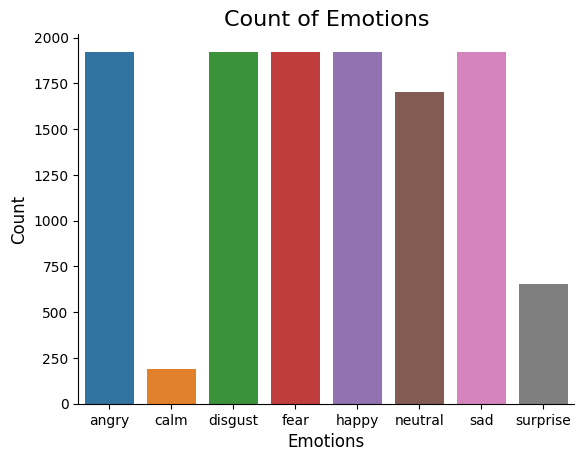

In [21]:
data_path['Emotions'] = data_path['Emotions'].astype('category')
plt.title('Count of Emotions', size=16)
sns.countplot(data=data_path, x='Emotions')
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

In [22]:
def create_waveplot(data, sr, e):
    plt.figure(figsize=(10, 3))
    plt.title('Waveplot for audio with {} emotion'.format(e), size=15)
    librosa.display.waveshow(data, sr=sr)
    plt.show()

def create_spectrogram(data, sr, e):
    # stft function converts the data into short term fourier transform
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(12, 3))
    plt.title('Spectrogram for audio with {} emotion'.format(e), size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')   
    #librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar()

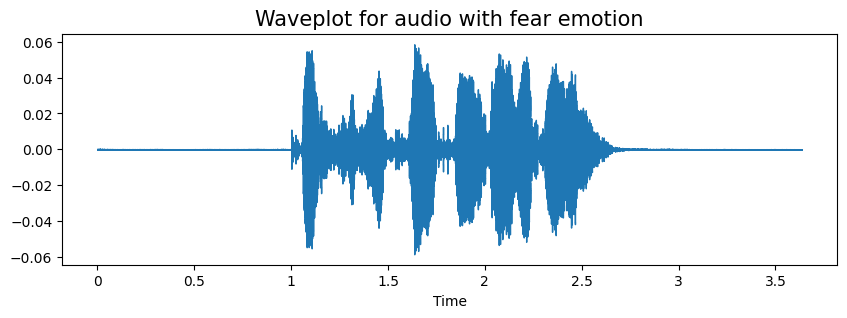

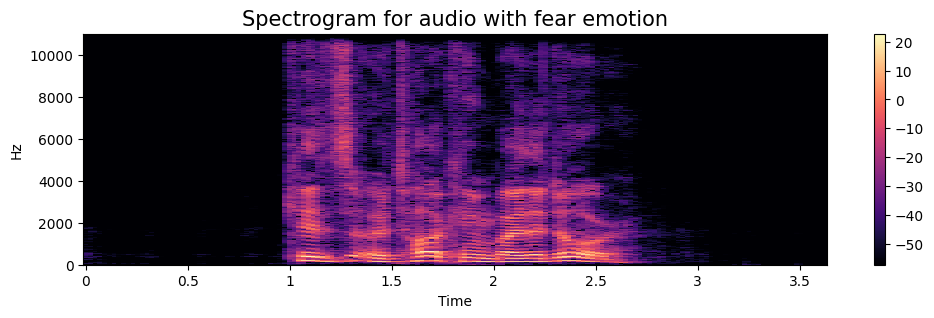

In [23]:
emotion='fear'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

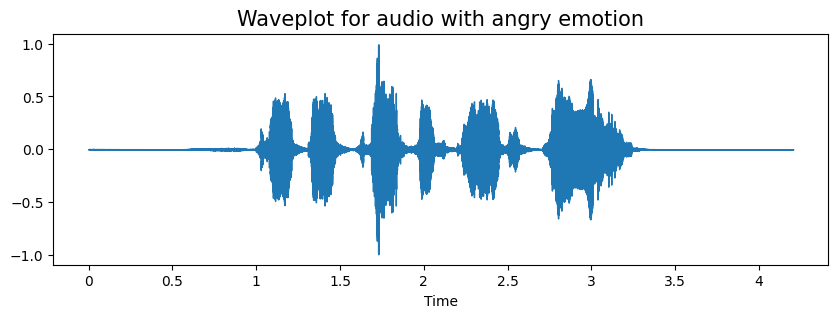

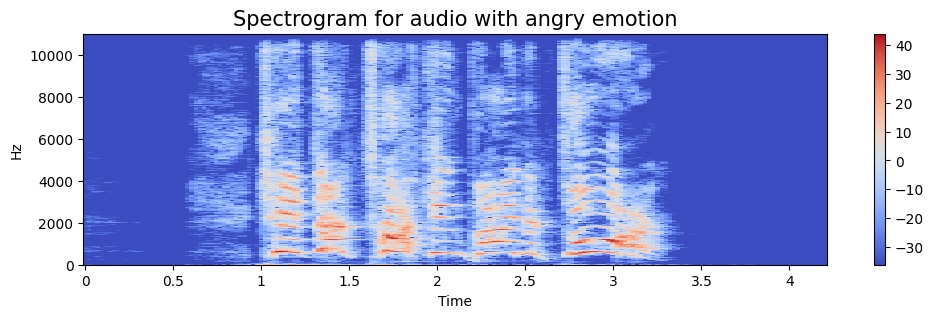

In [12]:
emotion='angry'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

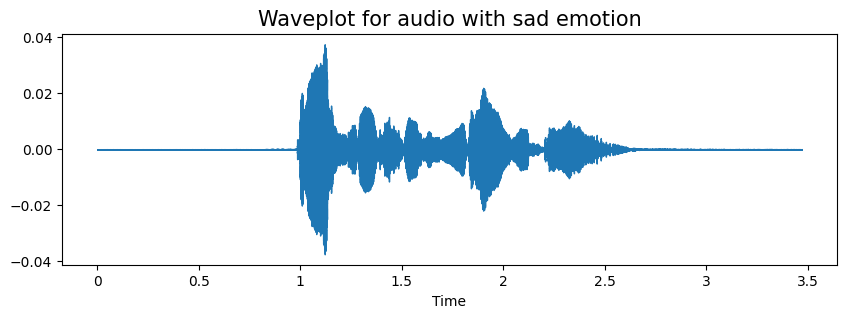

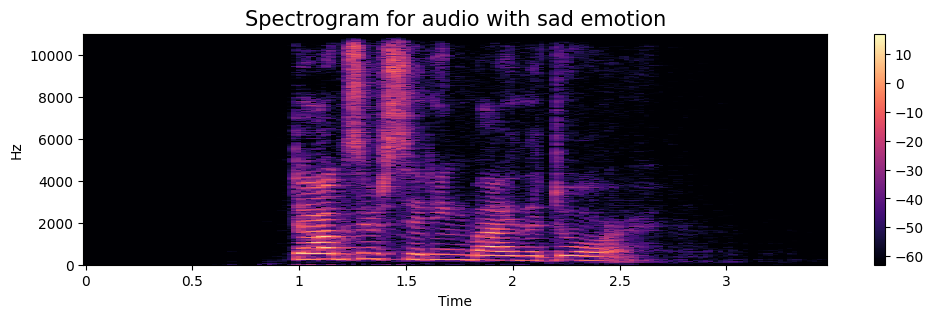

In [13]:
emotion='sad'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

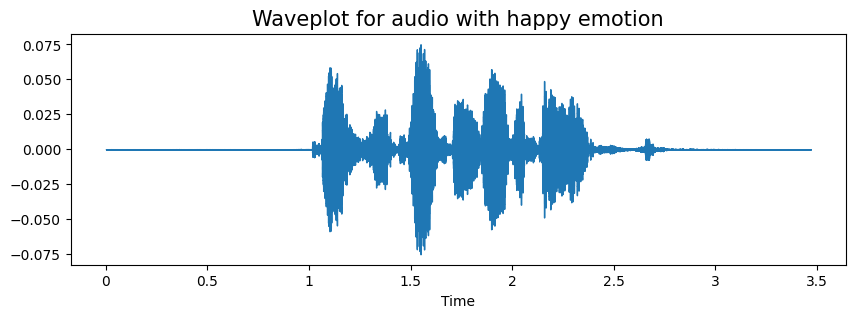

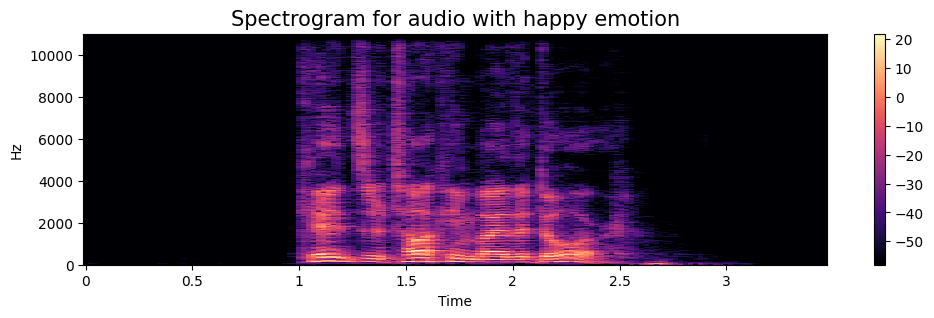

In [26]:
emotion='happy'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

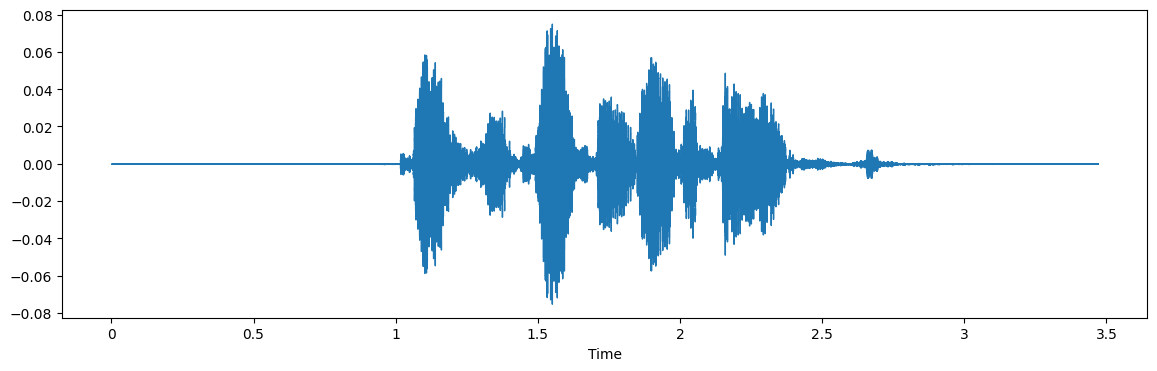

In [27]:
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=data, sr=sample_rate)
Audio(path)

In [24]:
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(data, rate=rate)

def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)

def pitch(data, sampling_rate, pitch_factor=0.7):
    # return librosa.effects.pitch_shift(data, sr=sampling_rate, pitch_factor)
    return librosa.effects.pitch_shift(data, sr=sampling_rate, n_steps=pitch_factor)

# taking any example and checking for techniques.
path = np.array(data_path.Path)[1]
data, sample_rate = librosa.load(path)

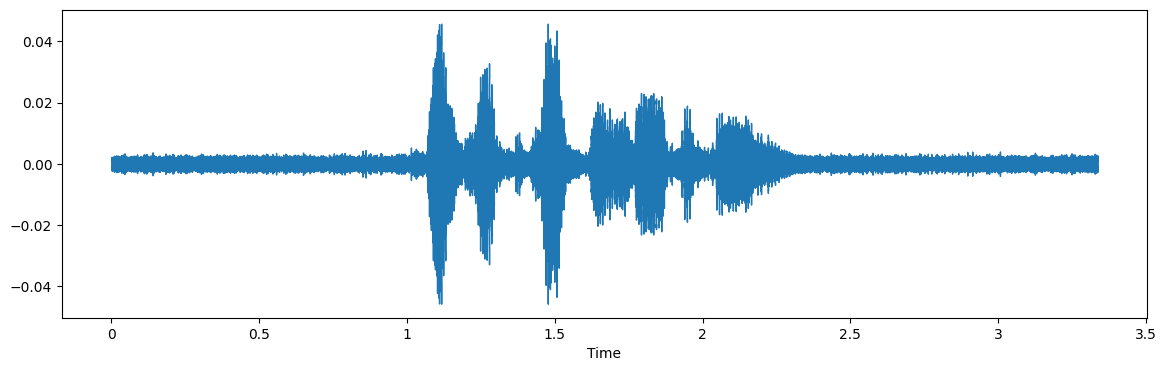

In [25]:
x = noise(data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

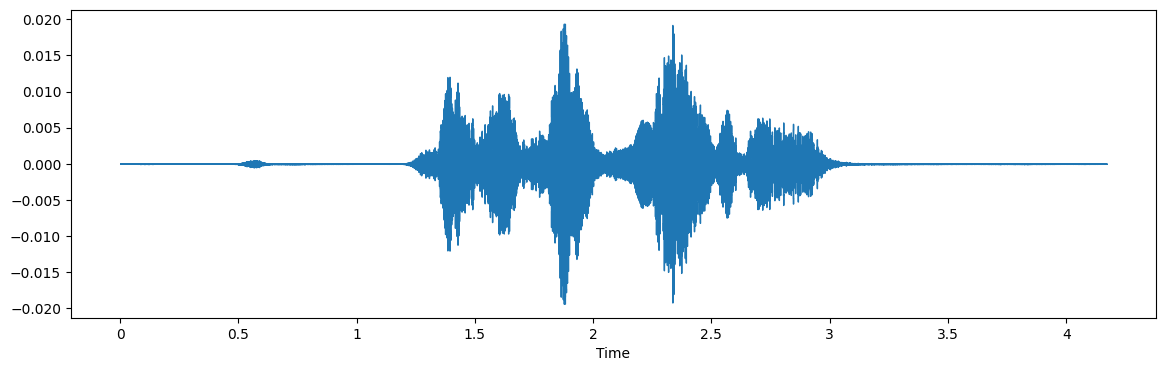

In [17]:
x = stretch(data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

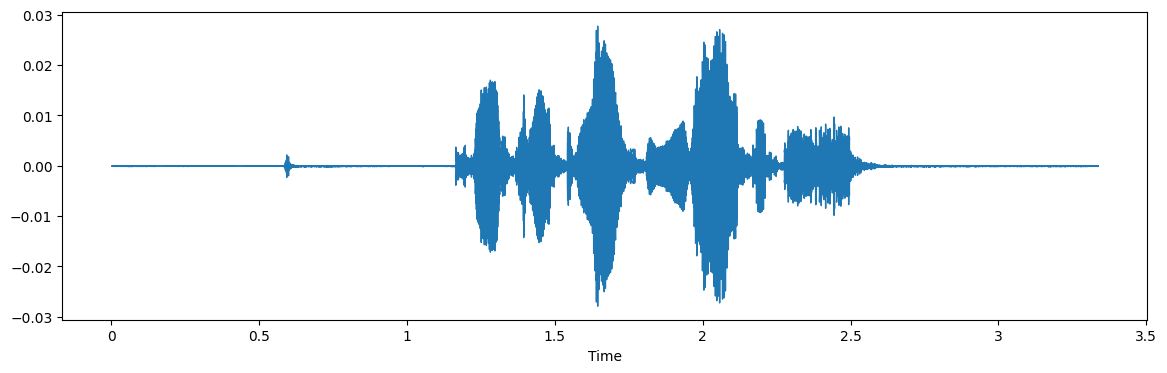

In [18]:
x = shift(data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

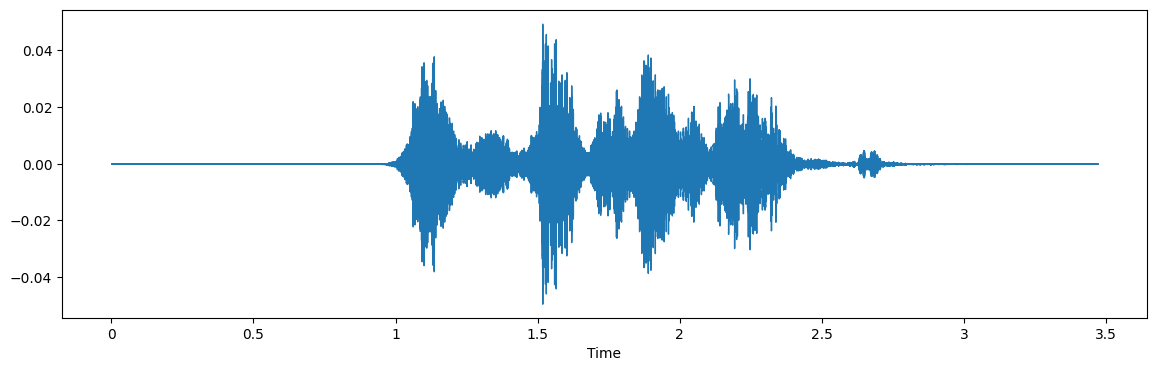

In [28]:
x = pitch(data, sample_rate)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

In [29]:
def extract_features(data):
    # ZCR
    result = np.array([])
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)
    result=np.hstack((result, zcr)) # stacking horizontally

    # Chroma_stft
    stft = np.abs(librosa.stft(data))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    result = np.hstack((result, chroma_stft)) # stacking horizontally

    # MFCC
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mfcc)) # stacking horizontally

    # Root Mean Square Value
    rms = np.mean(librosa.feature.rms(y=data).T, axis=0)
    result = np.hstack((result, rms)) # stacking horizontally

    # MelSpectogram
    mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mel)) # stacking horizontally
    
    return result

def get_features(path):
    # duration and offset are used to take care of the no audio in start and the ending of each audio files as seen above.
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)
    
    # without augmentation
    res1 = extract_features(data)
    result = np.array(res1)
    
    # data with noise
    noise_data = noise(data)
    res2 = extract_features(noise_data)
    result = np.vstack((result, res2)) # stacking vertically
    
    # data with stretching and pitching
    new_data = stretch(data)
    data_stretch_pitch = pitch(new_data, sample_rate)
    res3 = extract_features(data_stretch_pitch)
    result = np.vstack((result, res3)) # stacking vertically
    
    return result

In [30]:
# Print iterations progress
def printProgressBar (iteration, total, prefix = '', suffix = '', decimals = 1, length = 100, fill = '█', printEnd = "\r"):
    """
    Call in a loop to create terminal progress bar
    @params:
        iteration   - Required  : current iteration (Int)
        total       - Required  : total iterations (Int)
        prefix      - Optional  : prefix string (Str)
        suffix      - Optional  : suffix string (Str)
        decimals    - Optional  : positive number of decimals in percent complete (Int)
        length      - Optional  : character length of bar (Int)
        fill        - Optional  : bar fill character (Str)
        printEnd    - Optional  : end character (e.g. "\r", "\r\n") (Str)
    """
    percent = ("{0:." + str(decimals) + "f}").format(100 * (iteration / float(total)))
    filledLength = int(length * iteration // total)
    bar = fill * filledLength + '-' * (length - filledLength)
    print(f'\r{prefix} |{bar}| {percent}% {suffix}', end = printEnd)
    # Print New Line on Complete
    if iteration == total: 
        print()

In [35]:
X, Y = [], []
numOfSongsPath = data_path.shape[0]
num = 0
# Initial call to print 0% progress
printProgressBar(0, numOfSongsPath, prefix = f'Progress ({num}/{numOfSongsPath}):', suffix = 'Complete', length = 50)
for path, emotion in zip(data_path.Path, data_path.Emotions):
    num += 1
    feature = get_features(path)
    l = len(feature)
    for ele in feature:
        X.append(ele)
        # appending emotion 3 times as we have made 3 augmentation techniques on each audio file.
        Y.append(emotion)
    printProgressBar(num, numOfSongsPath, prefix = f'Progress ({num}/{numOfSongsPath}):', suffix = f'{path[:20]}... Complete', length = 50)

Progress (12162/12162): |██████████████████████████████████████████████████| 100.0% ./Dataset/Surrey Aud... Complete


In [36]:
len(X), len(Y), data_path.Path.shape

(36486, 36486, (12162,))

In [37]:
Features = pd.DataFrame(X)
Features['labels'] = Y
Features.to_csv('features.csv', index=False)
Features.head()

0         1         2         3         4         5         6  \
0  0.321275  0.729664  0.750033  0.730624  0.735275  0.713529  0.660531   
1  0.332271  0.796529  0.841952  0.819225  0.819889  0.827068  0.737606   
2  0.188256  0.622128  0.699219  0.753332  0.721223  0.701737  0.682353   
3  0.293566  0.673896  0.722096  0.723508  0.682302  0.680533  0.675352   
4  0.325109  0.783255  0.824884  0.810951  0.788143  0.801255  0.738988   

          7         8         9  ...           153           154  \
0  0.684966  0.733049  0.753972  ...  4.310903e-06  3.291511e-06   
1  0.673076  0.724018  0.763603  ...  1.090052e-04  1.078040e-04   
2  0.662828  0.686490  0.733966  ...  8.576332e-07  9.576413e-07   
3  0.628977  0.679179  0.707283  ...  6.984504e-06  7.034949e-06   
4  0.662046  0.710896  0.747749  ...  1.089480e-04  1.093169e-04   

            155           156           157           158       159       160  \
0  2.148075e-06  2.279739e-06  5.116492e-06  8.190282e-06  0.000007  0.000005   
1  1.132760e-04  1.080453e-04  1.042051e-04  1.146571e-04  0.000109  0.000106   
2  7.733594e-07  5.233102e-07  3.592796e-07  9.261686e-07  0.000002  0.000001   
3  6.654923e-06  6.979549e-06  1.214236e-05  9.640183e-06  0.000011  0.000006   
4  1.097081e-04  1.077000e-04  1.205941e-04  1.122379e-04  0.000114  0.000112   

            161   labels  
0  4.245835e-07  neutral  
1  1.039136e-04  neutral  
2  7.753985e-08  neutral  
3  4.254087e-07  neutral  
4  1.042034e-04  neutral  

[5 rows x 163 columns]

In [2]:
Features = pd.read_csv('features.csv')

In [3]:
X = Features.iloc[: ,:-1].values
Y = Features['labels'].values

In [4]:
# As this is a multiclass classification problem onehotencoding our Y.
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()

In [5]:
import pickle
pickle.dump(encoder, open('encoder.pkl', 'wb'))

In [16]:
# splitting data
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((27364, 162), (27364, 8), (9122, 162), (9122, 8))

In [17]:
# scaling our data with sklearn's Standard scaler
scaler = StandardScaler()
# scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((27364, 162), (27364, 8), (9122, 162), (9122, 8))

In [18]:
# making our data compatible to model.
x_train = np.expand_dims(x_train, axis=2)
x_test = np.expand_dims(x_test, axis=2)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((27364, 162, 1), (27364, 8), (9122, 162, 1), (9122, 8))

In [27]:
# V0.0
varsion = "v0"
model_v0 = Sequential()
model_v0.add(Conv1D(128, kernel_size=3, padding='same', input_shape=(x_train.shape[1],1),activation='relu'))
model_v0.add(MaxPooling1D(pool_size=3))
model_v0.add(Flatten())
model_v0.add(Dense(64, activation='relu'))
model_v0.add(Dense(8, activation='softmax'))

model_v0.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
model_v0.summary()
model = model_v0
model.fit(x_train, y_train, epochs=50, batch_size=32, validation_data=(x_test, y_test))


Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_9 (Conv1D)            (None, 162, 128)          512       
_________________________________________________________________
max_pooling1d_8 (MaxPooling1 (None, 54, 128)           0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 6912)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 64)                442432    
_________________________________________________________________
dense_6 (Dense)              (None, 8)                 520       
Total params: 443,464
Trainable params: 443,464
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
856/856 [==============================] - 20s 23ms/step - loss: 1.5337 - accuracy: 0.4223 - val_loss: 

In [33]:
# V0.1
varsion = "v0.1"
model_v0 = Sequential()
model_v0.add(Conv1D(128, kernel_size=3, padding='same', input_shape=(x_train.shape[1],1),activation='relu'))
model_v0.add(MaxPooling1D(pool_size=3))
model_v0.add(Flatten())
model_v0.add(Dense(64, activation='relu'))
model_v0.add(Dense(8, activation='softmax'))

model_v0.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0004), loss='categorical_crossentropy', metrics=['accuracy'])
model_v0.summary()

model = model_v0
history = model.fit(x_train, y_train, epochs=200, batch_size=32, validation_data=(x_test, y_test))


Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_10 (Conv1D)           (None, 162, 128)          512       
_________________________________________________________________
max_pooling1d_9 (MaxPooling1 (None, 54, 128)           0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 6912)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 64)                442432    
_________________________________________________________________
dense_8 (Dense)              (None, 8)                 520       
Total params: 443,464
Trainable params: 443,464
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
856/856 [==============================] - 19s 22ms/step - loss: 1.4140 - accuracy: 0.4613 - val_loss:

In [36]:
# V0.1
varsion = "v0.2"
model_v0_2 = Sequential()
model_v0_2.add(Conv1D(128, kernel_size=3, padding='same', input_shape=(x_train.shape[1],1),activation='relu'))
model_v0_2.add(MaxPooling1D(pool_size=3))

model_v0_2.add(Flatten())
model_v0_2.add(Dense(64, activation='relu'))
model_v0_2.add(Dropout(0.3))

model_v0_2.add(Dense(32, activation='relu'))
model_v0_2.add(Dense(8, activation='softmax'))

model_v0_2.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0006), loss='categorical_crossentropy', metrics=['accuracy'])
model_v0_2.summary()

model = model_v0_2
history = model.fit(x_train, y_train, epochs=200, batch_size=32, validation_data=(x_test, y_test))

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_11 (Conv1D)           (None, 162, 128)          512       
_________________________________________________________________
max_pooling1d_10 (MaxPooling (None, 54, 128)           0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 6912)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 64)                442432    
_________________________________________________________________
dropout_4 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_11 (Dense)             (None, 8)                

In [ ]:
# V1.0
model_v1=Sequential()
model_v1.add(Conv1D(512, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(x_train.shape[1], 1)))
model_v1.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model_v1.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu'))
model_v1.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model_v1.add(Conv1D(128, kernel_size=5, strides=1, padding='same', activation='relu'))
model_v1.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))
model_v1.add(Dropout(0.2))

model_v1.add(Conv1D(64, kernel_size=5, strides=1, padding='same', activation='relu'))
model_v1.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model_v1.add(Flatten())
model_v1.add(Dense(units=32, activation='relu'))
model_v1.add(Dropout(0.3))

model_v1.add(Dense(units=8, activation='softmax'))
model_v1.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

model_v1.summary()

In [19]:
# V2.0
model_v2=Sequential()
model_v2.add(Conv1D(512, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(x_train.shape[1], 1)))
model_v2.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model_v2.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu'))
model_v2.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model_v2.add(Conv1D(128, kernel_size=5, strides=1, padding='same', activation='relu'))
model_v2.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))
model_v2.add(Dropout(0.3))

model_v2.add(Conv1D(64, kernel_size=5, strides=1, padding='same', activation='relu'))
model_v2.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model_v2.add(Flatten())
model_v2.add(Dense(units=32, activation='relu'))
model_v2.add(Dropout(0.2))

model_v2.add(Dense(units=16, activation='relu'))

model_v2.add(Dense(units=8, activation='softmax'))
model_v2.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])
model_v2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_4 (Conv1D)            (None, 162, 512)          3072      
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 81, 512)           0         
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 81, 256)           655616    
_________________________________________________________________
max_pooling1d_5 (MaxPooling1 (None, 41, 256)           0         
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 41, 128)           163968    
_________________________________________________________________
max_pooling1d_6 (MaxPooling1 (None, 21, 128)           0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 21, 128)          

In [ ]:
# Pilih modelnya
model = model_v2

In [20]:
epochs = 50
version = "v2.0"
rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=0, patience=2, min_lr=0.0000001)
history=model.fit(x_train, y_train, batch_size=64, epochs=epochs, validation_data=(x_test, y_test), callbacks=[rlrp])

Epoch 1/50
428/428 [==============================] - 377s 882ms/step - loss: 1.6985 - accuracy: 0.3072 - val_loss: 1.4862 - val_accuracy: 0.3797 - lr: 0.0010
Epoch 2/50
428/428 [==============================] - 337s 788ms/step - loss: 1.4515 - accuracy: 0.4089 - val_loss: 1.3338 - val_accuracy: 0.4585 - lr: 0.0010
Epoch 3/50
428/428 [==============================] - 345s 807ms/step - loss: 1.3613 - accuracy: 0.4483 - val_loss: 1.2869 - val_accuracy: 0.4787 - lr: 0.0010
Epoch 4/50
428/428 [==============================] - 337s 788ms/step - loss: 1.2997 - accuracy: 0.4731 - val_loss: 1.2351 - val_accuracy: 0.5019 - lr: 0.0010
Epoch 5/50
428/428 [==============================] - 377s 880ms/step - loss: 1.2672 - accuracy: 0.4905 - val_loss: 1.2074 - val_accuracy: 0.5113 - lr: 0.0010
Epoch 6/50
428/428 [==============================] - 370s 864ms/step - loss: 1.2256 - accuracy: 0.5049 - val_loss: 1.2120 - val_accuracy: 0.5210 - lr: 0.0010
Epoch 7/50
428/428 [==========================

In [37]:
saved_model_path = os.path.join("models", "v0.2")
model.save(saved_model_path)

INFO:tensorflow:Assets written to: models\v0.2\assets


286/286 [==============================] - 2s 6ms/step - loss: 1.1252 - accuracy: 0.6267
Accuracy of our model on test data :  62.672656774520874 %


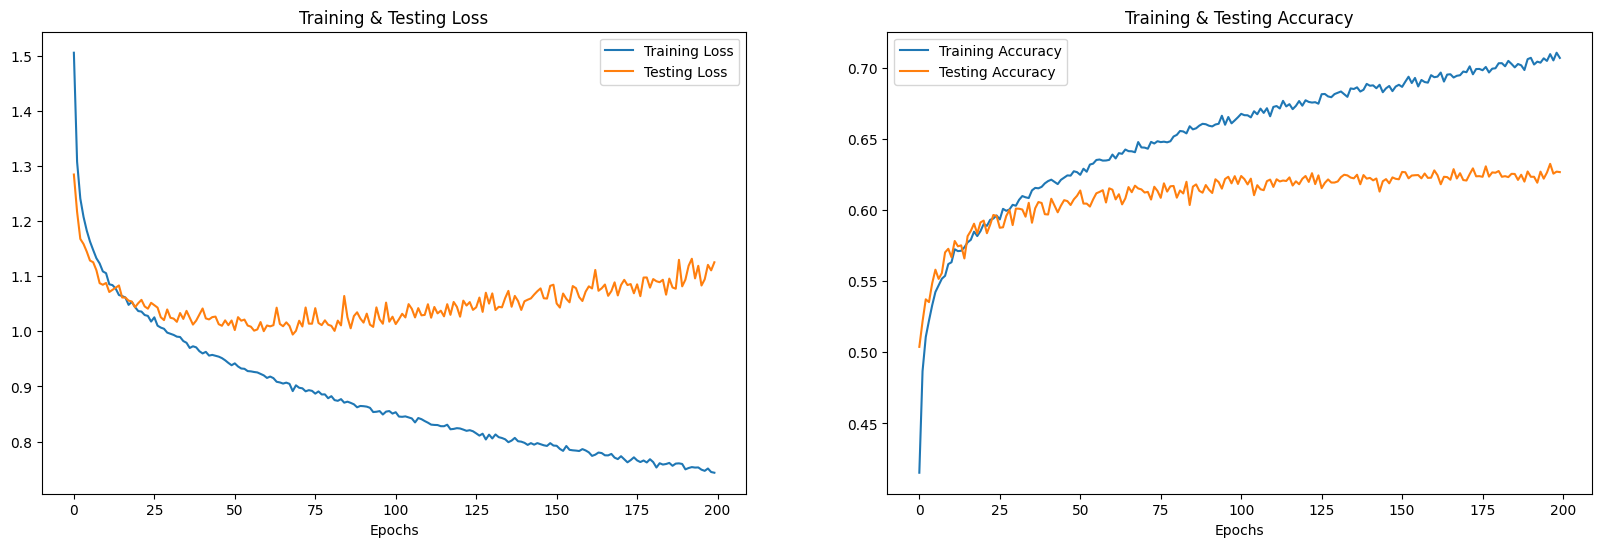

In [38]:
print("Accuracy of our model on test data : " , model.evaluate(x_test,y_test)[1]*100 , "%")

epochs = [i for i in range(200)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

In [67]:
audio_path = 'audiorecord.webm'
data, _ = librosa.load(audio_path, duration=2.5, offset=0.6)
emotion_prediction = model.predict(np.expand_dims(np.array([extract_features(data)]), axis=2))
print("Prediction:", encoder.inverse_transform(emotion_prediction.reshape(1, -1))[0][0].upper())

NoBackendError: 

In [61]:
# predicting on test data.
pred_test = model.predict(x_test)
print(x_test.shape)
# y_pred = encoder.inverse_transform(pred_test)

# y_test = encoder.inverse_transform(y_test)

(9122, 162, 1)


In [52]:
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred.flatten()
df['Actual Labels'] = y_test.flatten()

df.head(10)

Predicted Labels Actual Labels
0              sad       disgust
1          disgust       disgust
2            angry         angry
3          disgust       disgust
4          neutral          fear
5              sad          fear
6              sad         happy
7            happy         happy
8          disgust           sad
9          neutral           sad

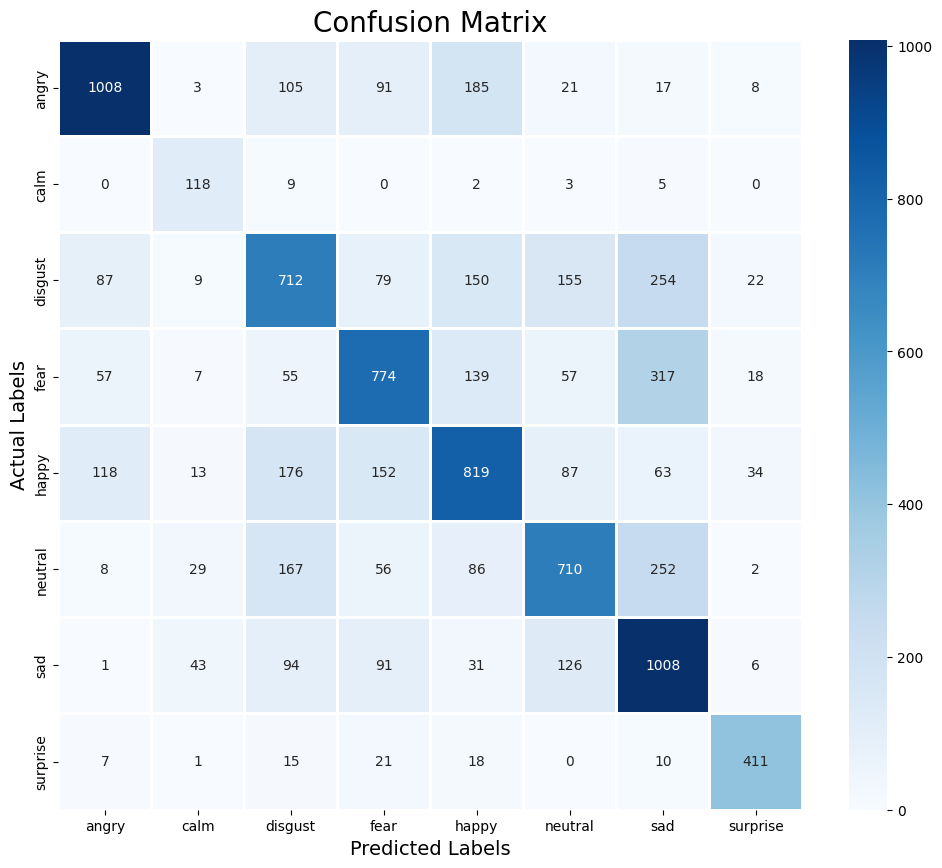

In [53]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

In [54]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       angry       0.78      0.70      0.74      1438
        calm       0.53      0.86      0.66       137
     disgust       0.53      0.49      0.51      1468
        fear       0.61      0.54      0.58      1424
       happy       0.57      0.56      0.57      1462
     neutral       0.61      0.54      0.58      1310
         sad       0.52      0.72      0.61      1400
    surprise       0.82      0.85      0.84       483

    accuracy                           0.61      9122
   macro avg       0.62      0.66      0.63      9122
weighted avg       0.62      0.61      0.61      9122



---------------------------------------------------------------------------------------------------------------

- [ ] Muat Dataset

In [ ]:
print("Hello")


- [ ] Pra proses

- [ ] Split Data (Train&Val)

- [ ] Define ML Model

- [ ] Train da model

- [ ] Evaluate

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=8e3e1d63-2a55-4dcb-8826-d15658c6a54b' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>